# Proyecto Final 
## Predicci√≥n de Aprobaci√≥n de Pr√©stamos Bancarios

**Autor:** Juan Pablo Jim√©nez Mart√≠n, Fabian Rodriguez Herrera 
**Fecha:** Octubre 2025  
**Objetivo:** Desarrollar una red neuronal artificial para predecir la probabilidad de aprobaci√≥n de pr√©stamos bancarios en funci√≥n de las caracter√≠sticas del solicitante, alcanzando una precisi√≥n superior al 80%.

---

## 1. AN√ÅLISIS Y EXPLORACI√ìN DE DATOS

En esta primera fase del proyecto, realizaremos un an√°lisis exhaustivo del conjunto de datos para comprender:
- La estructura y caracter√≠sticas de nuestros datos
- Distribuciones de variables
- Relaciones entre caracter√≠sticas
- Calidad de los datos (valores faltantes, outliers, etc.)

Este an√°lisis es fundamental para tomar decisiones informadas durante el preprocesamiento y el dise√±o de la arquitectura de nuestra red neuronal.

### 1.1. Carga y Exploraci√≥n Inicial del Dataset

En esta secci√≥n importaremos las librer√≠as necesarias y cargaremos el dataset para realizar una primera exploraci√≥n de su estructura.

#### 1.1.1. Importaci√≥n de Librer√≠as

Importaremos las librer√≠as fundamentales para el an√°lisis de datos:
- **pandas**: Manipulaci√≥n y an√°lisis de datos estructurados
- **numpy**: Operaciones num√©ricas y matrices
- **matplotlib y seaborn**: Visualizaci√≥n de datos
- **warnings**: Control de advertencias del sistema

In [135]:
# Importaci√≥n de librer√≠as para an√°lisis de datos
import pandas as pd
import numpy as np

# Librer√≠as para visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Configuraci√≥n para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Suprimir advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')


#### 1.1.2. Carga del Dataset

Cargaremos el dataset de aprobaci√≥n de pr√©stamos desde el archivo CSV. Este conjunto de datos contiene informaci√≥n de solicitantes de pr√©stamos bancarios y el resultado de su solicitud (aprobado/rechazado).

In [136]:
# Cargar el dataset
df = pd.read_csv('Dataset/loan_approval_dataset.csv')
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")


Dimensiones del dataset: 4269 filas y 13 columnas


In [137]:
# Nos percatamos de que nuestro dataset tenia espacios en blanco en los nombres de las columnas, por lo que procederemos a limpiarlos para evitar problemas en el an√°lisis.
print("Limpieza de nombres de columnas\n")
print("="*70)

print("Nombres ANTES de limpiar:")
print(df.columns.tolist())

# Eliminar espacios al inicio y final de los nombres de columnas
df.columns = df.columns.str.strip()

print("\nNombres DESPU√âS de limpiar:")
print(df.columns.tolist())

Limpieza de nombres de columnas

Nombres ANTES de limpiar:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Nombres DESPU√âS de limpiar:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#### 1.1.3. Visualizaci√≥n de las Primeras Filas

Examinaremos las primeras filas del dataset para entender la estructura y el tipo de informaci√≥n que contiene cada columna.

In [138]:
# Visualizar las primeras 10 filas del dataset
print("Primeras 10 filas del dataset:\n")
display(df.head(10))

Primeras 10 filas del dataset:



loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   
5        6                 0       Graduate           Yes       4800000   
6        7                 5       Graduate            No       8700000   
7        8                 2       Graduate           Yes       5700000   
8        9                 0       Graduate           Yes        800000   
9       10                 5   Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected  
5                  8300000             13700000           5100000    Rejected  
6                 14800000             29200000           4300000    Approved  
7                  5700000             11800000           6000000    Rejected  
8                   800000              2800000            600000    Approved  
9                  1400000              3300000           1600000    Rejected

#### 1.1.4. Informaci√≥n General del Dataset

Analizaremos los tipos de datos, la presencia de valores nulos y la memoria utilizada por el dataset.

In [139]:
# Informaci√≥n general del dataset
print("Informaci√≥n general del dataset:\n")
print(df.info())
print("\n" + "="*70 + "\n")

# Resumen de tipos de datos
print("Resumen de tipos de datos:")
print(f"- Variables num√©ricas: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"- Variables categ√≥ricas/objeto: {df.select_dtypes(include=['object']).shape[1]}")

Informaci√≥n general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7

#### 1.1.5. An√°lisis de Valores √önicos

Examinaremos los valores √∫nicos de cada columna para identificar variables categ√≥ricas y detectar posibles inconsistencias en los datos.

In [140]:
# An√°lisis de valores √∫nicos por columna
print("Valores √∫nicos por columna:\n")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:30s}: {unique_count:5d} valores √∫nicos")
    
    # Mostrar valores √∫nicos si son menos de 10 (variables categ√≥ricas)
    if unique_count < 10:
        print(f"Valores: {df[col].unique()}")

Valores √∫nicos por columna:

loan_id                       :  4269 valores √∫nicos
no_of_dependents              :     6 valores √∫nicos
Valores: [2 0 3 5 4 1]
education                     :     2 valores √∫nicos
Valores: [' Graduate' ' Not Graduate']
self_employed                 :     2 valores √∫nicos
Valores: [' No' ' Yes']
income_annum                  :    98 valores √∫nicos
loan_amount                   :   378 valores √∫nicos
loan_term                     :    10 valores √∫nicos
cibil_score                   :   601 valores √∫nicos
residential_assets_value      :   278 valores √∫nicos
commercial_assets_value       :   188 valores √∫nicos
luxury_assets_value           :   379 valores √∫nicos
bank_asset_value              :   146 valores √∫nicos
loan_status                   :     2 valores √∫nicos
Valores: [' Approved' ' Rejected']


### 1.2. An√°lisis Estad√≠stico Descriptivo

Realizaremos un an√°lisis estad√≠stico completo de las variables num√©ricas y categ√≥ricas para comprender la distribuci√≥n de los datos y detectar posibles anomal√≠as.

#### 1.2.1. Estad√≠sticas Descriptivas de Variables Num√©ricas

Calcularemos medidas de tendencia central (media, mediana) y dispersi√≥n (desviaci√≥n est√°ndar, rangos) para todas las variables num√©ricas.

In [141]:
# Seleccionar solo columnas num√©ricas (excluyendo loan_id)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

# Estad√≠sticas descriptivas
print("Estad√≠sticas Descriptivas de Variables Num√©ricas:\n")
stats_df = df[numerical_cols].describe().T
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['cv'] = (stats_df['std'] / stats_df['mean']) * 100  # Coeficiente de variaci√≥n

display(stats_df)

Estad√≠sticas Descriptivas de Variables Num√©ricas:



count        mean        std        min        25%  \
no_of_dependents         4269.00        2.50       1.70       0.00       1.00   
income_annum             4269.00  5059123.92 2806839.83  200000.00 2700000.00   
loan_amount              4269.00 15133450.46 9043362.98  300000.00 7700000.00   
loan_term                4269.00       10.90       5.71       2.00       6.00   
cibil_score              4269.00      599.94     172.43     300.00     453.00   
residential_assets_value 4269.00  7472616.54 6503636.59 -100000.00 2200000.00   
commercial_assets_value  4269.00  4973155.31 4388966.09       0.00 1300000.00   
luxury_assets_value      4269.00 15126305.93 9103753.67  300000.00 7500000.00   
bank_asset_value         4269.00  4976692.43 3250185.31       0.00 2300000.00   

                                 50%         75%         max       range    cv  
no_of_dependents                3.00        4.00        5.00        5.00 67.87  
income_annum              5100000.00  7500000.00  9900000.00  9700000.00 55.48  
loan_amount              14500000.00 21500000.00 39500000.00 39200000.00 59.76  
loan_term                      10.00       16.00       20.00       18.00 52.38  
cibil_score                   600.00      748.00      900.00      600.00 28.74  
residential_assets_value  5600000.00 11300000.00 29100000.00 29200000.00 87.03  
commercial_assets_value   3700000.00  7600000.00 19400000.00 19400000.00 88.25  
luxury_assets_value      14600000.00 21700000.00 39200000.00 38900000.00 60.18  
bank_asset_value          4600000.00  7100000.00 14700000.00 14700000.00 65.31

#### 1.2.2. An√°lisis de Variables Categ√≥ricas

Analizaremos la frecuencia y distribuci√≥n de las variables categ√≥ricas para entender la composici√≥n de nuestros datos.

In [142]:
# Identificar variables categ√≥ricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'loan_id' in categorical_cols:
    categorical_cols.remove('loan_id')

print("An√°lisis de Variables Categ√≥ricas:\n")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 50)
    
    # Contar frecuencias
    freq = df[col].value_counts()
    freq_pct = df[col].value_counts(normalize=True) * 100
    
    # Crear DataFrame de resultados
    result = pd.DataFrame({
        'Frecuencia': freq,
        'Porcentaje': freq_pct
    })
    
    print(result)
    print()

An√°lisis de Variables Categ√≥ricas:


EDUCATION:
--------------------------------------------------
              Frecuencia  Porcentaje
education                           
Graduate            2144       50.22
Not Graduate        2125       49.78


SELF_EMPLOYED:
--------------------------------------------------
               Frecuencia  Porcentaje
self_employed                        
Yes                  2150       50.36
No                   2119       49.64


LOAN_STATUS:
--------------------------------------------------
             Frecuencia  Porcentaje
loan_status                        
Approved           2656       62.22
Rejected           1613       37.78



#### 1.2.3. An√°lisis de Valores Faltantes

Verificaremos la presencia de valores faltantes (NaN, None, espacios vac√≠os) que puedan afectar el entrenamiento del modelo.

In [143]:
# An√°lisis de valores faltantes
print("An√°lisis de Valores Faltantes:\n")

# Contar valores nulos
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame de resultados
missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje': missing_pct
})

# Filtrar solo columnas con valores faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No se encontraron valores faltantes en el dataset")

print(f"\nTotal de valores faltantes: {df.isnull().sum().sum()}")

An√°lisis de Valores Faltantes:

No se encontraron valores faltantes en el dataset

Total de valores faltantes: 0


### 1.3. Visualizaci√≥n de Distribuciones

Crearemos visualizaciones para entender la distribuci√≥n de las variables y detectar patrones, outliers y asimetr√≠as que puedan influir en el modelo.

#### 1.3.1. Distribuci√≥n de Variables Num√©ricas (Histogramas)

Los histogramas nos permiten visualizar la forma de la distribuci√≥n de cada variable num√©rica y detectar asimetr√≠as o valores extremos.

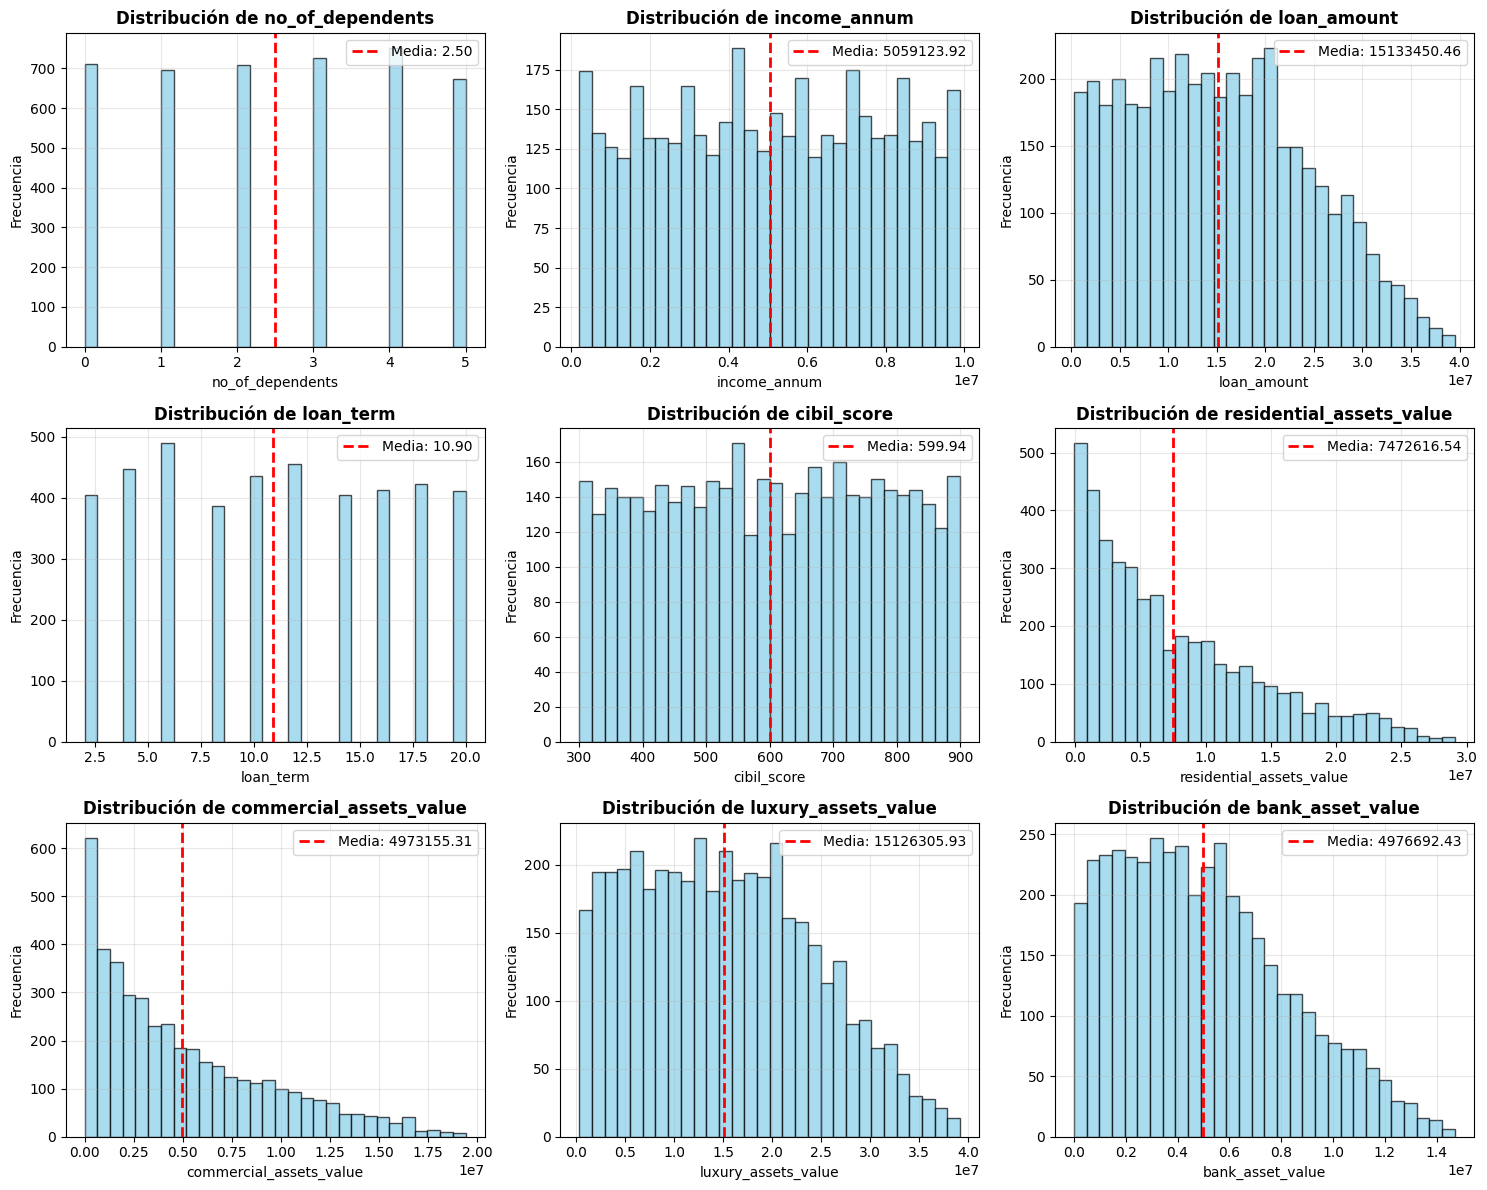

In [144]:
# Configuraci√≥n de la visualizaci√≥n
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear histograma para cada variable num√©rica
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribuci√≥n de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    # A√±adir l√≠nea de media
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].legend()

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.3.2. Boxplots para Detecci√≥n de Outliers

Los diagramas de caja nos ayudan a identificar valores at√≠picos (outliers) que podr√≠an afectar el entrenamiento de la red neuronal.

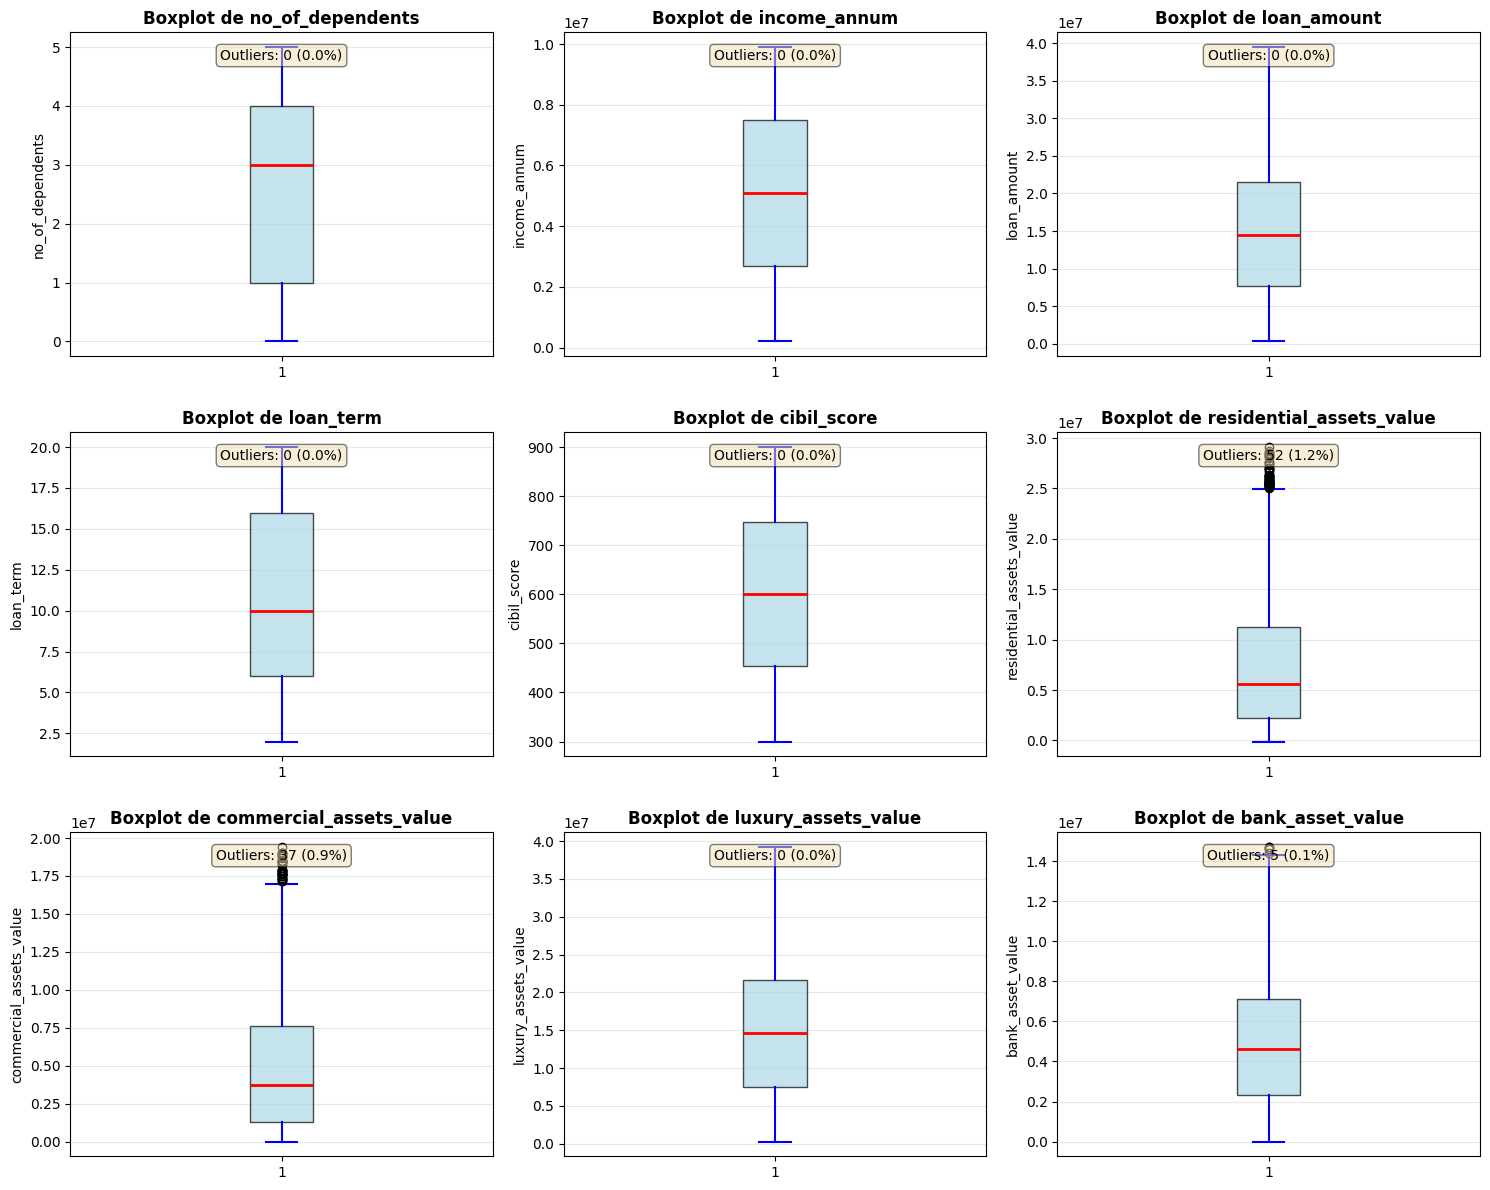

In [145]:
# Configuraci√≥n de la visualizaci√≥n
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear boxplot para cada variable num√©rica
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5))
    
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calcular cantidad de outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.3.3. Distribuci√≥n de Variables Categ√≥ricas

Visualizaremos la distribuci√≥n de las variables categ√≥ricas para entender la composici√≥n de los datos.

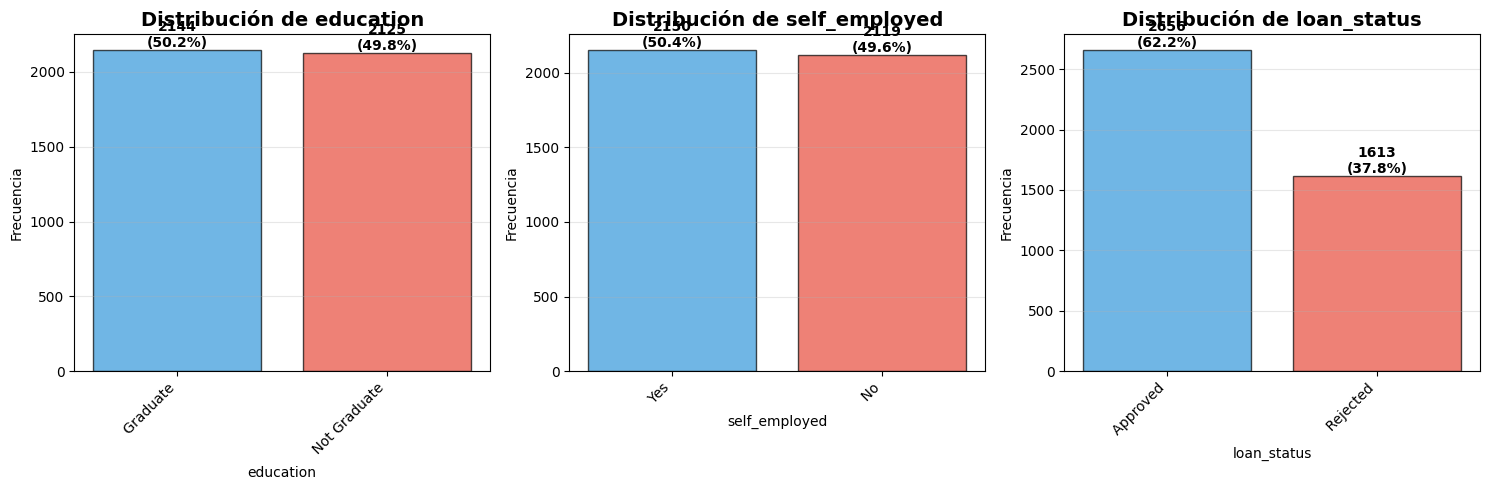

In [146]:
# N√∫mero de variables categ√≥ricas
n_cat = len(categorical_cols)

# Configuraci√≥n de la visualizaci√≥n
fig, axes = plt.subplots(1, n_cat, figsize=(5 * n_cat, 5))
if n_cat == 1:
    axes = [axes]

# Crear gr√°fico de barras para cada variable categ√≥rica
for idx, col in enumerate(categorical_cols):
    # Contar frecuencias
    value_counts = df[col].value_counts()
    
    # Crear gr√°fico de barras
    bars = axes[idx].bar(range(len(value_counts)), value_counts.values, 
                          color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(value_counts)],
                          alpha=0.7, edgecolor='black')
    
    axes[idx].set_title(f'Distribuci√≥n de {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # A√±adir valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height)}\n({height/len(df)*100:.1f}%)',
                      ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.4. An√°lisis de la Variable Objetivo

Realizaremos un an√°lisis profundo de la variable objetivo (loan_status) y su relaci√≥n con las dem√°s variables para entender qu√© caracter√≠sticas influyen en la aprobaci√≥n de pr√©stamos.

#### 1.4.1. Distribuci√≥n de la Variable Objetivo

Analizaremos el balance entre las clases de nuestra variable objetivo (Approved vs Rejected).

In [178]:
# An√°lisis de la variable objetivo
print("AN√ÅLISIS DE LA VARIABLE OBJETIVO: loan_status")
print("="*70)

# Contar frecuencias
target_counts = df['loan_status'].value_counts()
target_pct = df['loan_status'].value_counts(normalize=True) * 100

print("\nDistribuci√≥n de clases:")
for status, count in target_counts.items():
    pct = target_pct[status]
    print(f"  {status:12s}: {count:5d} ({pct:5.2f}%)")

# Calcular ratio de desbalance
approved = target_counts.get('Approved', 0)
rejected = target_counts.get('Rejected', 0)
ratio = max(approved, rejected) / min(approved, rejected) if min(approved, rejected) > 0 else 0

print(f"\nRatio de desbalance: {ratio:.2f}:1")

# Evaluar nivel de desbalance
if ratio <= 1.5:
    print("Las clases est√°n balanceadas")
elif ratio <= 3.0:
    print("Desbalance moderado")
else:
    print("Desbalance severo.")

AN√ÅLISIS DE LA VARIABLE OBJETIVO: loan_status

Distribuci√≥n de clases:
  Approved    :  2656 (62.22%)
  Rejected    :  1613 (37.78%)

Ratio de desbalance: 1.65:1
Desbalance moderado


#### 1.4.2. Visualizaci√≥n de la Variable Objetivo

Crearemos visualizaciones para representar la distribuci√≥n de la variable objetivo de forma clara.

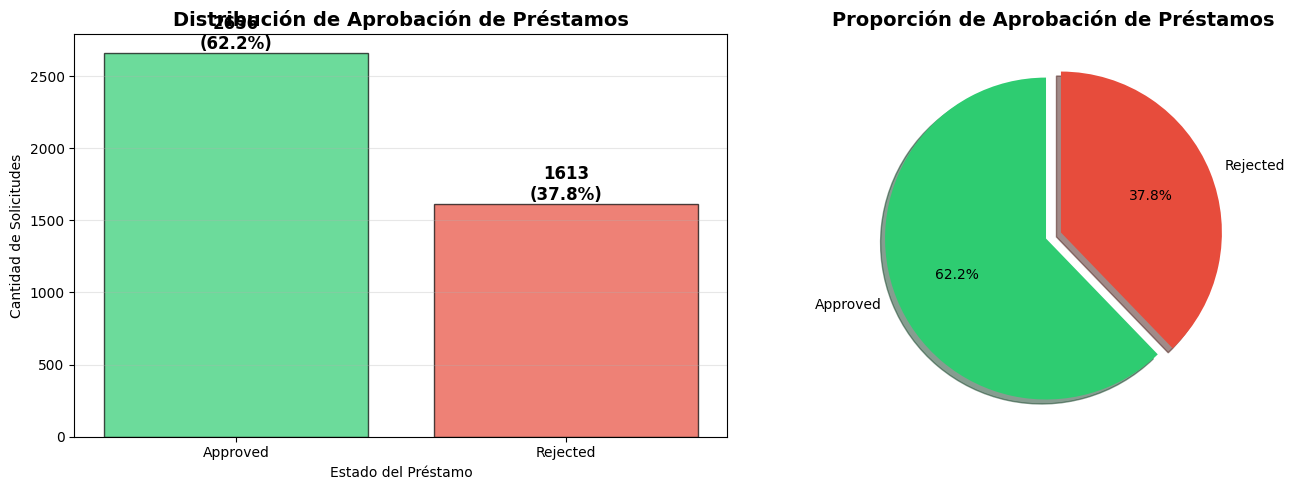

In [148]:
# Crear figura con dos subgr√°ficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico de barras
colors = ['#2ecc71', '#e74c3c']  # Verde para Approved, Rojo para Rejected
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribuci√≥n de Aprobaci√≥n de Pr√©stamos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Estado del Pr√©stamo')
axes[0].set_ylabel('Cantidad de Solicitudes')
axes[0].grid(True, alpha=0.3, axis='y')

# A√±adir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Gr√°fico de pastel
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, explode=[0.05, 0.05], shadow=True)
axes[1].set_title('Proporci√≥n de Aprobaci√≥n de Pr√©stamos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1.4.3. Relaci√≥n de Variables Num√©ricas con la Variable Objetivo

Analizaremos c√≥mo las variables num√©ricas difieren entre pr√©stamos aprobados y rechazados usando boxplots comparativos. Esto nos ayudar√° a identificar qu√© caracter√≠sticas son m√°s discriminativas para la clasificaci√≥n.

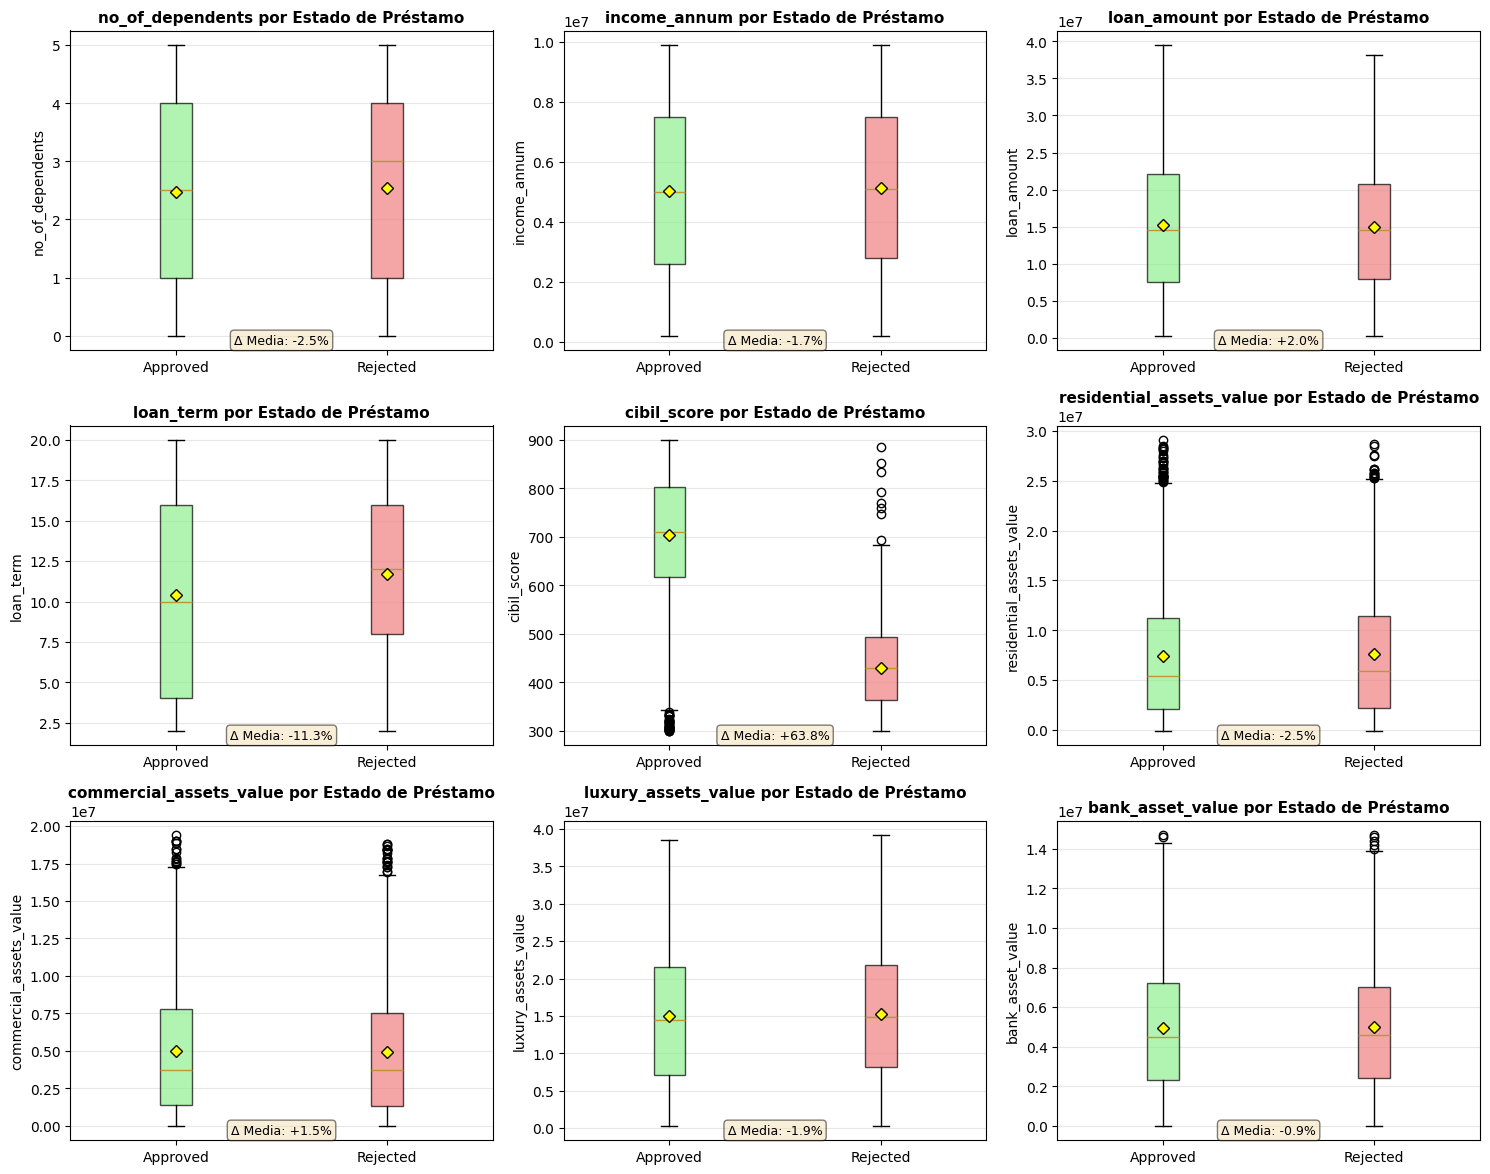

In [149]:
# Configuraci√≥n de la visualizaci√≥n
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Crear boxplot comparativo para cada variable num√©rica
for idx, col in enumerate(numerical_cols):
    # Preparar datos por categor√≠a
    data_approved = df[df['loan_status'] == 'Approved'][col]
    data_rejected = df[df['loan_status'] == 'Rejected'][col]
    
    # Crear boxplot
    bp = axes[idx].boxplot([data_approved, data_rejected],
                           labels=['Approved', 'Rejected'],
                           patch_artist=True,
                           showmeans=True,
                           meanprops=dict(marker='D', markerfacecolor='yellow', markeredgecolor='black'))
    
    # Colorear las cajas
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{col} por Estado de Pr√©stamo', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calcular y mostrar medias
    mean_approved = data_approved.mean()
    mean_rejected = data_rejected.mean()
    diff_pct = ((mean_approved - mean_rejected) / mean_rejected * 100) if mean_rejected != 0 else 0
    
    axes[idx].text(0.5, 0.02, f'Œî Media: {diff_pct:+.1f}%',
                   transform=axes[idx].transAxes, ha='center',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

# Ocultar ejes no utilizados
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### 1.4.4. Relaci√≥n de Variables Categ√≥ricas con la Variable Objetivo

Analizaremos la tasa de aprobaci√≥n seg√∫n las variables categ√≥ricas para identificar patrones que ayuden a la clasificaci√≥n.

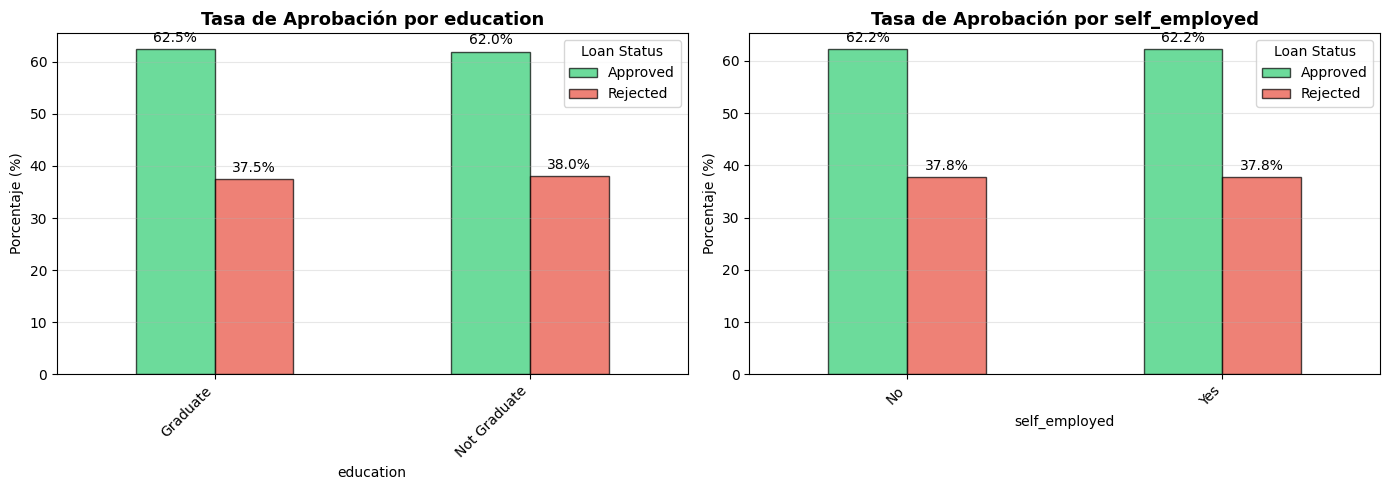


Tablas de Contingencia (Porcentajes por fila):


EDUCATION:
--------------------------------------------------
loan_status   Approved  Rejected
education                       
Graduate         62.45     37.55
Not Graduate     61.98     38.02


SELF_EMPLOYED:
--------------------------------------------------
loan_status    Approved  Rejected
self_employed                    
No                62.20     37.80
Yes               62.23     37.77



In [150]:
# Seleccionar variables categ√≥ricas (excluyendo loan_status)
cat_cols_for_analysis = [col for col in categorical_cols if col != 'loan_status']

# Configuraci√≥n de la visualizaci√≥n
n_cat = len(cat_cols_for_analysis)
fig, axes = plt.subplots(1, n_cat, figsize=(7 * n_cat, 5))
if n_cat == 1:
    axes = [axes]

# Analizar cada variable categ√≥rica
for idx, col in enumerate(cat_cols_for_analysis):
    # Limpiar espacios en blanco
    df[col] = df[col].str.strip()
    
    # Crear tabla cruzada
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    
    # Crear gr√°fico de barras agrupadas
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    
    axes[idx].set_title(f'Tasa de Aprobaci√≥n por {col}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Loan Status', loc='upper right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    # A√±adir valores en las barras
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

# Mostrar tabla de contingencia
print("\nTablas de Contingencia (Porcentajes por fila):\n")
for col in cat_cols_for_analysis:
    print(f"\n{col.upper()}:")
    print("-" * 50)
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    print(ct.round(2))
    print()

#### 1.4.5. Matriz de Correlaci√≥n

Calcularemos la correlaci√≥n entre variables num√©ricas para identificar:
- Multicolinealidad (variables altamente correlacionadas entre s√≠)
- Relaciones lineales entre caracter√≠sticas

**Nota:** Para clasificaci√≥n, no podemos correlacionar directamente con loan_status (es categ√≥rica), pero identificar multicolinealidad nos ayuda a entender redundancia entre predictores.

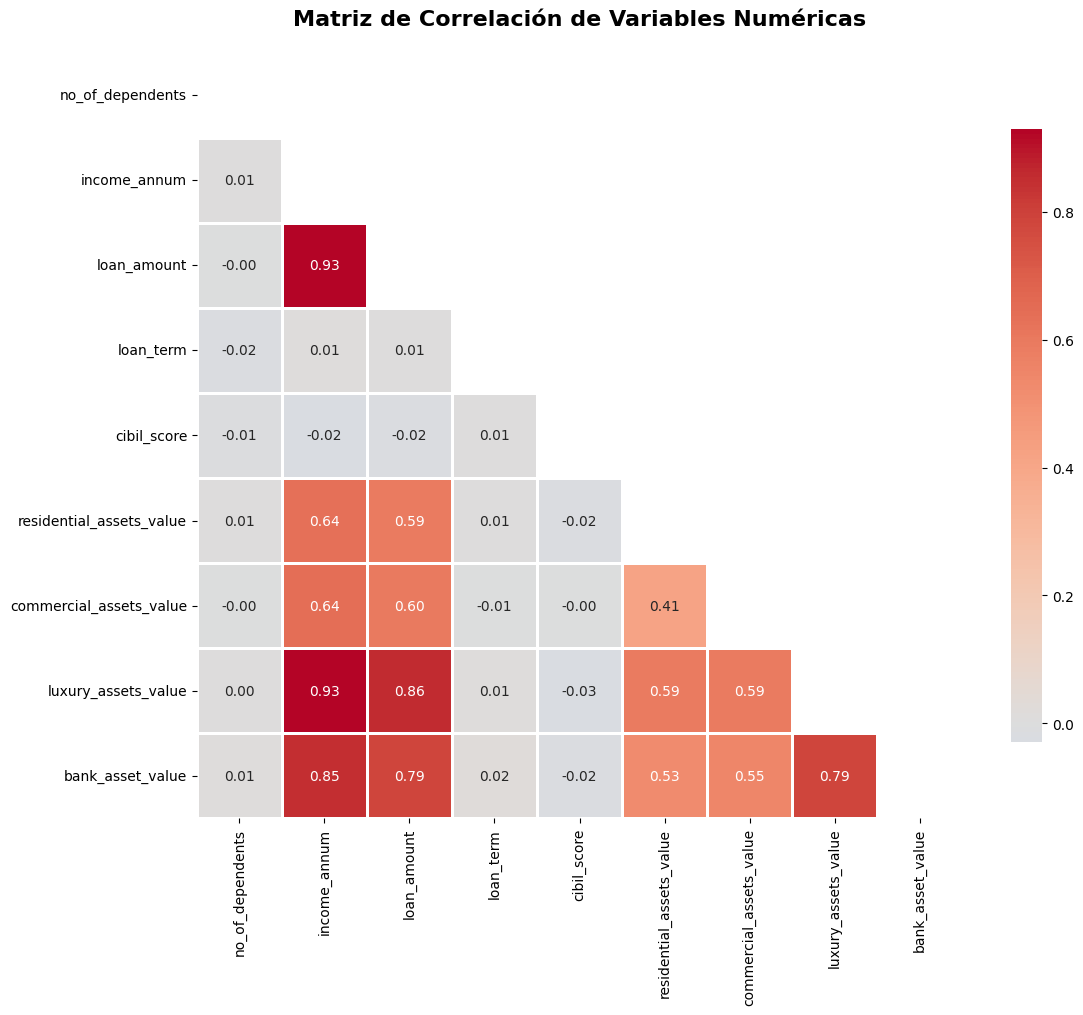


Correlaciones Fuertes (|r| > 0.7):

income_annum                   <-> loan_amount                   :  0.927
income_annum                   <-> luxury_assets_value           :  0.929
income_annum                   <-> bank_asset_value              :  0.851
loan_amount                    <-> luxury_assets_value           :  0.861
loan_amount                    <-> bank_asset_value              :  0.788
luxury_assets_value            <-> bank_asset_value              :  0.789


In [151]:
# Crear una copia del dataframe para an√°lisis de correlaci√≥n
df_corr = df[numerical_cols].copy()

# Calcular matriz de correlaci√≥n
correlation_matrix = df_corr.corr()

# Crear visualizaci√≥n
plt.figure(figsize=(12, 10))

# Heatmap de correlaci√≥n
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # M√°scara triangular
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\nCorrelaciones Fuertes (|r| > 0.7):\n")
print("="*70)

threshold = 0.7
correlations_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"{correlation_matrix.columns[i]:30s} <-> {correlation_matrix.columns[j]:30s}: {correlation_matrix.iloc[i, j]:6.3f}")
            correlations_found = True

if not correlations_found:
    print("No se encontraron correlaciones fuertes (|r| > 0.7) entre variables")

## 2. PREPROCESAMIENTO DE DATOS

El preprocesamiento es una fase cr√≠tica que prepara los datos para el entrenamiento de la red neuronal. En esta secci√≥n realizaremos:

1. **Limpieza de datos**: Eliminar inconsistencias, duplicados y valores an√≥malos
2. **Codificaci√≥n de variables**: Convertir variables categ√≥ricas a formato num√©rico
3. **Normalizaci√≥n**: Escalar las caracter√≠sticas num√©ricas a un rango com√∫n
4. **Balanceo de clases**: Ajustar la distribuci√≥n de la variable objetivo si es necesario
5. **Divisi√≥n del dataset**: Separar datos en conjuntos de entrenamiento, validaci√≥n y prueba

Estos pasos son esenciales para que la red neuronal pueda aprender eficientemente y generalizar bien a nuevos datos.

### 2.1. Limpieza de Datos

Realizaremos una limpieza exhaustiva del dataset para eliminar inconsistencias y preparar los datos para el modelado.

#### 2.1.1. Limpieza de Espacios en Blanco

Eliminaremos espacios adicionales en variables de texto que puedan causar problemas en el procesamiento.

In [152]:
# Crear una copia del dataframe para preprocesamiento
df_clean = df.copy()

# Limpiar espacios en todas las columnas de tipo object
for col in df_clean.select_dtypes(include=['object']).columns:
    # Contar valores antes de limpiar
    before = df_clean[col].apply(lambda x: x != x.strip() if isinstance(x, str) else False).sum()
    
    # Limpiar espacios
    df_clean[col] = df_clean[col].str.strip()

#### 2.1.2. Detecci√≥n y Eliminaci√≥n de Duplicados

Verificaremos si existen registros duplicados que puedan sesgar el entrenamiento del modelo.

In [153]:
print("DETECCI√ìN DE REGISTROS DUPLICADOS\n")
print("="*70)

# Verificar duplicados (excluyendo loan_id que es √∫nico)
cols_to_check = [col for col in df_clean.columns if col != 'loan_id']
duplicates = df_clean.duplicated(subset=cols_to_check, keep='first')

print(f"Registros duplicados encontrados: {duplicates.sum()}")

if duplicates.sum() > 0:
    print(f"Porcentaje de duplicados: {duplicates.sum() / len(df_clean) * 100:.2f}%")
    
    # Eliminar duplicados
    df_clean = df_clean[~duplicates].reset_index(drop=True)
    
    print(f"\n‚úì {duplicates.sum()} registros duplicados eliminados")
    print(f"Registros restantes: {len(df_clean)}")
else:
    print("No se encontraron registros duplicados")

print(f"\nDimensiones del dataset despu√©s de limpieza: {df_clean.shape}")

DETECCI√ìN DE REGISTROS DUPLICADOS

Registros duplicados encontrados: 0
No se encontraron registros duplicados

Dimensiones del dataset despu√©s de limpieza: (4269, 13)


#### 2.1.3. Tratamiento de Outliers

Analizaremos outliers extremos que podr√≠an afectar el entrenamiento. Para problemas de clasificaci√≥n, no siempre es necesario eliminar outliers ya que pueden representar casos leg√≠timos (ej: pr√©stamos grandes).

Implementaremos un enfoque conservador: solo marcaremos outliers extremos (m√°s all√° de 3 desviaciones est√°ndar) y decidiremos caso por caso.

In [154]:
print("AN√ÅLISIS DE OUTLIERS EXTREMOS\n")
print("="*70)

# Funci√≥n para detectar outliers usando Z-score
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    return z_scores > threshold

# Analizar cada variable num√©rica
outlier_summary = {}
for col in numerical_cols:
    outliers_mask = detect_outliers_zscore(df_clean, col, threshold=3)
    outlier_count = outliers_mask.sum()
    outlier_pct = (outlier_count / len(df_clean)) * 100
    outlier_summary[col] = {'count': outlier_count, 'pct': outlier_pct}
    
    print(f"{col:30s}: {outlier_count:4d} outliers extremos ({outlier_pct:5.2f}%)")

# Resumen
total_outliers = sum(item['count'] for item in outlier_summary.values())
print(f"\n{'TOTAL':30s}: {total_outliers:4d} outliers extremos detectados")


AN√ÅLISIS DE OUTLIERS EXTREMOS

no_of_dependents              :    0 outliers extremos ( 0.00%)
income_annum                  :    0 outliers extremos ( 0.00%)
loan_amount                   :    0 outliers extremos ( 0.00%)
loan_term                     :    0 outliers extremos ( 0.00%)
cibil_score                   :    0 outliers extremos ( 0.00%)
residential_assets_value      :   16 outliers extremos ( 0.37%)
commercial_assets_value       :   17 outliers extremos ( 0.40%)
luxury_assets_value           :    0 outliers extremos ( 0.00%)
bank_asset_value              :    0 outliers extremos ( 0.00%)

TOTAL                         :   33 outliers extremos detectados


### 2.2. Codificaci√≥n de Variables

Convertiremos las variables categ√≥ricas a formato num√©rico, que es el formato requerido por las redes neuronales.

**Estrategia de codificaci√≥n:**
- **Variable objetivo (loan_status)**: Label Encoding ‚Üí Approved=1, Rejected=0
- **Variables categ√≥ricas (education, self_employed)**: One-Hot Encoding ‚Üí Creaci√≥n de variables dummy

#### 2.2.1. Codificaci√≥n de la Variable Objetivo

Convertiremos la variable objetivo loan_status a formato binario num√©rico.

In [159]:
from sklearn.preprocessing import LabelEncoder

print("CODIFICACI√ìN DE LA VARIABLE OBJETIVO\n")
print("="*70)

# Mostrar valores originales
print("Valores originales de loan_status:")
print(df_clean['loan_status'].value_counts())

# Crear codificador
le = LabelEncoder()

# Codificar variable objetivo
df_clean['loan_status_encoded'] = le.fit_transform(df_clean['loan_status'])

# Mostrar mapeo
print("\nMapeo de codificaci√≥n:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original:12s} ‚Üí {encoded}")

# Verificar distribuci√≥n
print("\nDistribuci√≥n despu√©s de codificaci√≥n:")
print(df_clean['loan_status_encoded'].value_counts().sort_index())

print("\nVariable objetivo codificada exitosamente")

CODIFICACI√ìN DE LA VARIABLE OBJETIVO

Valores originales de loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Mapeo de codificaci√≥n:
  Approved     ‚Üí 0
  Rejected     ‚Üí 1

Distribuci√≥n despu√©s de codificaci√≥n:
loan_status_encoded
0    2656
1    1613
Name: count, dtype: int64

Variable objetivo codificada exitosamente


#### 2.2.2. Codificaci√≥n de Variables Categ√≥ricas (One-Hot Encoding)

Convertiremos las variables categ√≥ricas (education, self_employed) usando One-Hot Encoding, que crea variables binarias para cada categor√≠a.

**Ejemplo:**
- education: "Graduate" ‚Üí education_Graduate=1, education_Not Graduate=0
- self_employed: "Yes" ‚Üí self_employed_Yes=1, self_employed_No=0

In [ ]:
print("CODIFICACI√ìN ONE-HOT DE VARIABLES CATEG√ìRICAS\n")
print("="*70)

# Identificar variables categ√≥ricas a codificar (excluyendo loan_status)
cat_cols_to_encode = [col for col in categorical_cols if col != 'loan_status']

print(f"Variables a codificar: {cat_cols_to_encode}\n")

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols_to_encode, prefix=cat_cols_to_encode, drop_first=False)

# Mostrar nuevas columnas creadas
print("Columnas creadas despu√©s de One-Hot Encoding:")
for col in cat_cols_to_encode:
    new_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]
    print(f"\n{col}:")
    for new_col in new_cols:
        count = df_encoded[new_col].sum()
        print(f"  - {new_col:40s}: {count:5.0f} registros con valor 1")

print(f"\nDimensiones despu√©s de codificaci√≥n: {df_encoded.shape}")
print(f"  - Variables originales: {df_clean.shape[1]}")
print(f"  - Variables despu√©s de One-Hot: {df_encoded.shape[1]}")
print(f"  - Nuevas variables creadas: {df_encoded.shape[1] - df_clean.shape[1]}")

print("\nVariables categ√≥ricas codificadas exitosamente")

CODIFICACI√ìN ONE-HOT DE VARIABLES CATEG√ìRICAS

Variables a codificar: ['education', 'self_employed']

Columnas creadas despu√©s de One-Hot Encoding:

education:
  - education_Graduate                      :  2144 registros con valor 1
  - education_Not Graduate                  :  2125 registros con valor 1

self_employed:
  - self_employed_No                        :  2119 registros con valor 1
  - self_employed_Yes                       :  2150 registros con valor 1

Dimensiones despu√©s de codificaci√≥n: (4269, 16)
  - Variables originales: 14
  - Variables despu√©s de One-Hot: 16
  - Nuevas variables creadas: 2

‚úì Variables categ√≥ricas codificadas exitosamente


### 2.3. Normalizaci√≥n de Caracter√≠sticas Num√©ricas

La normalizaci√≥n es crucial para redes neuronales porque:
1. Las variables tienen escalas muy diferentes (ej: cibil_score vs income_annum)
2. Escalas grandes pueden dominar el aprendizaje
3. La normalizaci√≥n acelera la convergencia del entrenamiento

Utilizaremos **StandardScaler** que transforma los datos para tener media=0 y desviaci√≥n est√°ndar=1.

**Importante:** Solo normalizaremos las variables num√©ricas originales, NO las variables One-Hot (ya est√°n en escala 0-1).

#### 2.3.1. Preparaci√≥n de Variables para Normalizaci√≥n

Identificaremos qu√© variables necesitan ser normalizadas.

In [156]:
print("PREPARACI√ìN PARA NORMALIZACI√ìN\n")
print("="*70)

# Variables num√©ricas originales a normalizar
vars_to_normalize = numerical_cols.copy()

# Primero necesitamos identificar qu√© columnas One-Hot se crear√°n
# (a√∫n no existen porque no hemos codificado)
cat_cols_to_encode = [col for col in categorical_cols if col != 'loan_status']

print("Variables que SER√ÅN normalizadas:")
print(f"  Total: {len(vars_to_normalize)}")
for var in vars_to_normalize:
    print(f"  - {var}")

print(f"\nVariables que NO ser√°n normalizadas:")
print(f"  - loan_id (identificador)")
print(f"  - loan_status y loan_status_encoded (variable objetivo)")
print(f"  - Variables One-Hot que se crear√°n despu√©s de codificar: {cat_cols_to_encode}")
print(f"    (Estas variables One-Hot ya estar√°n en escala 0-1)")


PREPARACI√ìN PARA NORMALIZACI√ìN

Variables que SER√ÅN normalizadas:
  Total: 9
  - no_of_dependents
  - income_annum
  - loan_amount
  - loan_term
  - cibil_score
  - residential_assets_value
  - commercial_assets_value
  - luxury_assets_value
  - bank_asset_value

Variables que NO ser√°n normalizadas:
  - loan_id (identificador)
  - loan_status y loan_status_encoded (variable objetivo)
  - Variables One-Hot que se crear√°n despu√©s de codificar: ['education', 'self_employed']
    (Estas variables One-Hot ya estar√°n en escala 0-1)


#### 2.3.2. Aplicaci√≥n de StandardScaler

Aplicaremos StandardScaler a las variables num√©ricas. Esta transformaci√≥n convierte cada variable a: **z = (x - Œº) / œÉ**

Donde:
- x = valor original
- Œº = media de la variable
- œÉ = desviaci√≥n est√°ndar
- z = valor normalizado

In [163]:
from sklearn.preprocessing import StandardScaler

print("APLICACI√ìN DE STANDARDSCALER\n")
print("="*70)

# Crear copia del dataframe para normalizaci√≥n
df_normalized = df_encoded.copy()

# Inicializar StandardScaler
scaler = StandardScaler()

# Mostrar estad√≠sticas ANTES de normalizar
print("Estad√≠sticas ANTES de normalizaci√≥n (primeras 3 variables):\n")
for col in vars_to_normalize[:3]:
    print(f"{col}:")
    print(f"  Media: {df_normalized[col].mean():,.2f}")
    print(f"  Std:   {df_normalized[col].std():,.2f}")
    print(f"  Min:   {df_normalized[col].min():,.2f}")
    print(f"  Max:   {df_normalized[col].max():,.2f}")
    print()

# Aplicar normalizaci√≥n
df_normalized[vars_to_normalize] = scaler.fit_transform(df_normalized[vars_to_normalize])

# Mostrar estad√≠sticas DESPU√âS de normalizar
print("="*70)
print("\nEstad√≠sticas DESPU√âS de normalizaci√≥n (primeras 3 variables):\n")
for col in vars_to_normalize[:3]:
    print(f"{col}:")
    print(f"  Media: {df_normalized[col].mean():.2f}")
    print(f"  Std:   {df_normalized[col].std():.2f}")
    print(f"  Min:   {df_normalized[col].min():.2f}")
    print(f"  Max:   {df_normalized[col].max():.2f}")
    print()

print("="*70)
print("‚úì Normalizaci√≥n completada exitosamente")
print(f"‚úì {len(vars_to_normalize)} variables normalizadas")
print("‚úì Media ‚âà 0 y Desviaci√≥n est√°ndar ‚âà 1 para todas las variables normalizadas")

APLICACI√ìN DE STANDARDSCALER

Estad√≠sticas ANTES de normalizaci√≥n (primeras 3 variables):

no_of_dependents:
  Media: 2.50
  Std:   1.70
  Min:   0.00
  Max:   5.00

income_annum:
  Media: 5,059,123.92
  Std:   2,806,839.83
  Min:   200,000.00
  Max:   9,900,000.00

loan_amount:
  Media: 15,133,450.46
  Std:   9,043,362.98
  Min:   300,000.00
  Max:   39,500,000.00


Estad√≠sticas DESPU√âS de normalizaci√≥n (primeras 3 variables):

no_of_dependents:
  Media: 0.00
  Std:   1.00
  Min:   -1.47
  Max:   1.48

income_annum:
  Media: 0.00
  Std:   1.00
  Min:   -1.73
  Max:   1.72

loan_amount:
  Media: 0.00
  Std:   1.00
  Min:   -1.64
  Max:   2.69

‚úì Normalizaci√≥n completada exitosamente
‚úì 9 variables normalizadas
‚úì Media ‚âà 0 y Desviaci√≥n est√°ndar ‚âà 1 para todas las variables normalizadas


#### 2.3.3. Visualizaci√≥n del Efecto de la Normalizaci√≥n

Compararemos las distribuciones antes y despu√©s de la normalizaci√≥n para algunas variables clave.

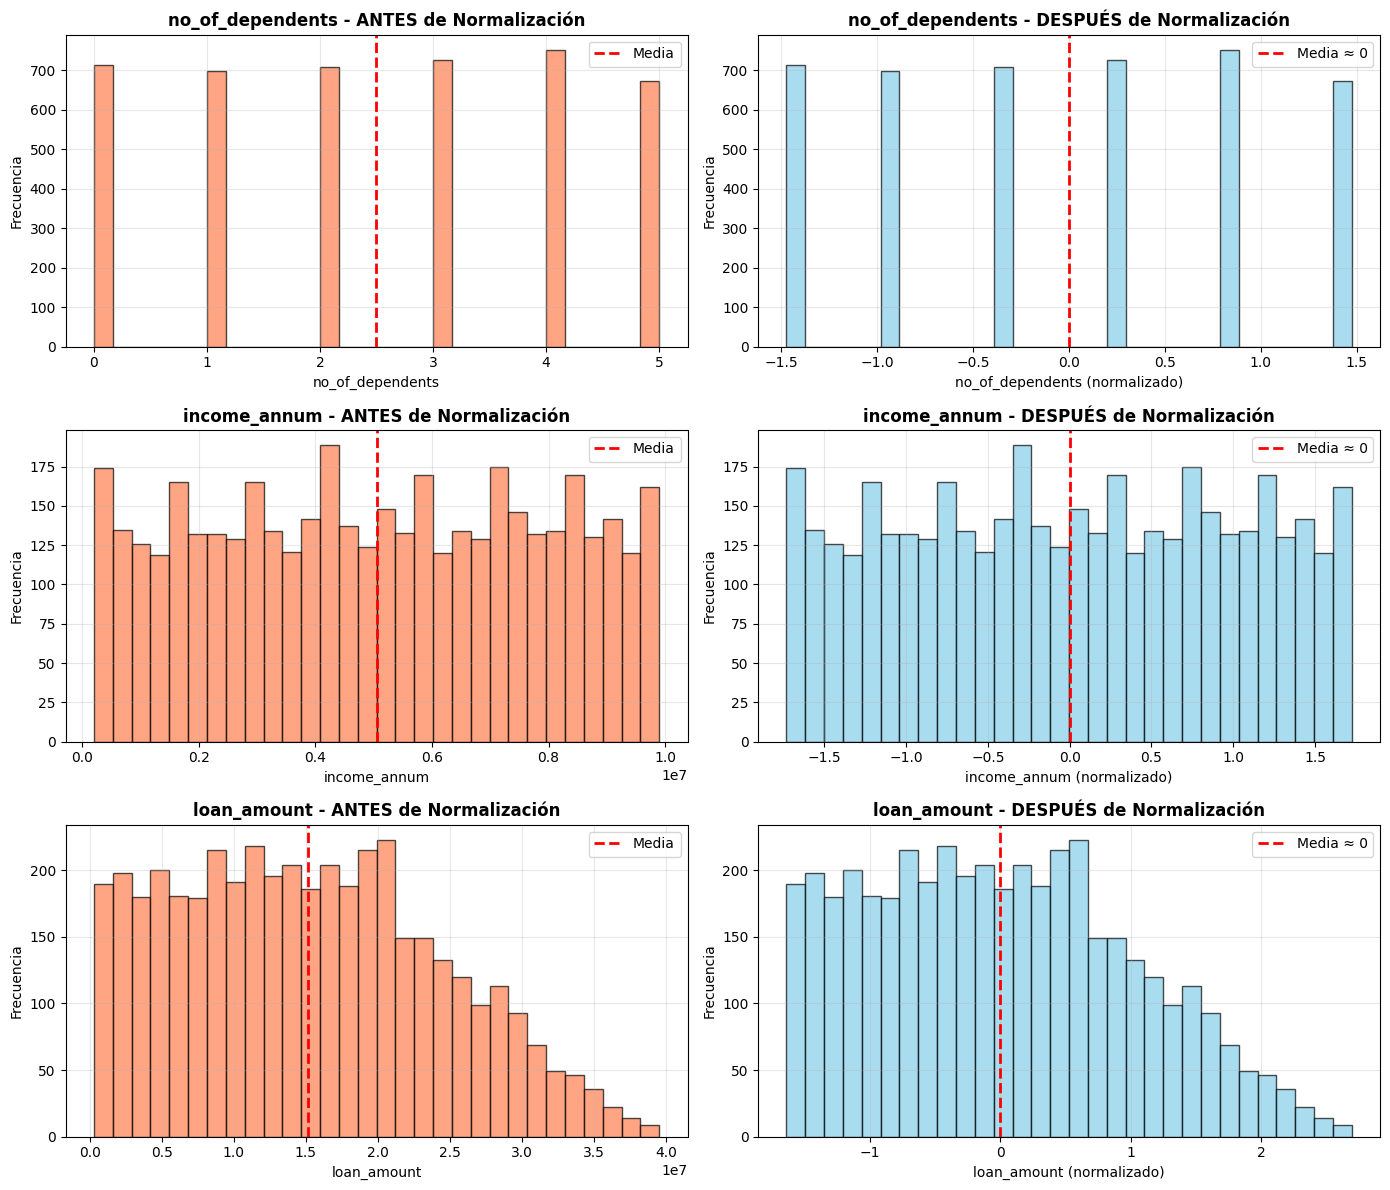

In [165]:
# Seleccionar 3 variables para visualizar el efecto
vars_to_plot = vars_to_normalize[:3]

fig, axes = plt.subplots(len(vars_to_plot), 2, figsize=(14, len(vars_to_plot) * 4))

for idx, col in enumerate(vars_to_plot):
    # Antes de normalizar (del df_encoded)
    axes[idx, 0].hist(df_encoded[col], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{col} - ANTES de Normalizaci√≥n', fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frecuencia')
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].axvline(df_encoded[col].mean(), color='red', linestyle='--', linewidth=2, label='Media')
    axes[idx, 0].legend()
    
    # Despu√©s de normalizar (del df_normalized)
    axes[idx, 1].hist(df_normalized[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{col} - DESPU√âS de Normalizaci√≥n', fontweight='bold')
    axes[idx, 1].set_xlabel(f'{col} (normalizado)')
    axes[idx, 1].set_ylabel('Frecuencia')
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].axvline(df_normalized[col].mean(), color='red', linestyle='--', linewidth=2, label='Media ‚âà 0')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

### 2.4. Balanceo de Clases

Evaluaremos si es necesario aplicar t√©cnicas de balanceo de clases para mejorar el rendimiento del modelo en la clase minoritaria.

#### 2.4.1. An√°lisis del Desbalance Actual

Verificaremos el nivel de desbalance en el dataset despu√©s del preprocesamiento.

In [171]:
print("AN√ÅLISIS DE BALANCEO DE CLASES\n")
print("="*70)

# Analizar distribuci√≥n de clases
class_distribution = df_normalized['loan_status_encoded'].value_counts().sort_index()
class_percentage = df_normalized['loan_status_encoded'].value_counts(normalize=True).sort_index() * 100

print("Distribuci√≥n actual de clases:")
print(f"\nClase 0: {class_distribution[0]:,} ({class_percentage[0]:.2f}%)")
print(f"Clase 1: {class_distribution[1]:,} ({class_percentage[1]:.2f}%)")

# Calcular ratio
ratio = max(class_distribution) / min(class_distribution)
print(f"\nRatio de desbalance: {ratio:.2f}:1")

# Evaluar necesidad de balanceo
print("\n" + "="*70)
print("EVALUACI√ìN:")
if ratio <= 1.5:
    print("‚úì Clases relativamente balanceadas (ratio ‚â§ 1.5:1)")
    print("‚úì NO se requiere balanceo de clases")
    print("‚úì El modelo puede entrenarse directamente con los datos actuales")
    apply_balancing = False
    balancing_method = "ninguno"
elif ratio <= 3.0:
    print("‚ö†Ô∏è  Desbalance moderado (1.5:1 < ratio ‚â§ 3.0)")
    print("üìå ESTRATEGIA ELEGIDA: class_weight='balanced'")
    print("\n   ‚úì Usaremos pesos de clase en el modelo")
    print("   ‚úì NO modificaremos el dataset (sin SMOTE)")
    print("   ‚úì El modelo dar√° m√°s importancia a la clase minoritaria durante el entrenamiento")
    apply_balancing = False  # No SMOTE
    balancing_method = "class_weight"
else:
    print("‚ö†Ô∏è  Desbalance severo (ratio > 3.0)")
    print("üìå ESTRATEGIA: Se recomienda SMOTE, pero probaremos primero con class_weight")
    apply_balancing = False
    balancing_method = "class_weight"

print("\n" + "="*70)

AN√ÅLISIS DE BALANCEO DE CLASES

Distribuci√≥n actual de clases:

Clase 0: 2,656 (62.22%)
Clase 1: 1,613 (37.78%)

Ratio de desbalance: 1.65:1

EVALUACI√ìN:
‚ö†Ô∏è  Desbalance moderado (1.5:1 < ratio ‚â§ 3.0)
üìå ESTRATEGIA ELEGIDA: class_weight='balanced'

   ‚úì Usaremos pesos de clase en el modelo
   ‚úì NO modificaremos el dataset (sin SMOTE)
   ‚úì El modelo dar√° m√°s importancia a la clase minoritaria durante el entrenamiento



#### 2.4.2. Estrategia de Balanceo: class_weight='balanced'

Explicaremos c√≥mo funciona la estrategia de balanceo mediante pesos de clase y c√≥mo se aplicar√° en el modelo.

In [172]:
print("ESTRATEGIA DE BALANCEO\n")
print("="*70)

if balancing_method == "class_weight":
    print("‚úì Estrategia elegida: class_weight='balanced'\n")
    print("¬øQu√© significa esto?")
    print("  - NO modificaremos el dataset (no creamos datos sint√©ticos)")
    print("  - Durante el entrenamiento, el modelo dar√° M√ÅS peso a la clase minoritaria")
    print("  - Keras ajustar√° autom√°ticamente la funci√≥n de p√©rdida")
    print("\nC√°lculo de pesos:")
    print(f"  - Clase 0: {class_distribution[0]:,} ejemplos")
    print(f"  - Clase 1: {class_distribution[1]:,} ejemplos")
    
    # Calcular pesos que usar√° el modelo
    total = len(df_normalized)
    weight_0 = total / (2 * class_distribution[0])
    weight_1 = total / (2 * class_distribution[1])
    
    print(f"\nPesos que aplicar√° el modelo:")
    print(f"  - Clase 0: {weight_0:.3f}")
    print(f"  - Clase 1: {weight_1:.3f}")
    print(f"\n  ‚Üí La clase minoritaria tendr√° {weight_1/weight_0:.2f}x m√°s peso en el entrenamiento")
    
    print("\nVentajas de class_weight:")
    print("  ‚úì M√°s simple que SMOTE (no crea datos sint√©ticos)")
    print("  ‚úì Mantiene el dataset original")
    print("  ‚úì Efectivo para desbalances moderados")
    print("  ‚úì Menos propenso a overfitting que SMOTE")
    print("  ‚úì Se aplica directamente en model.fit() con un par√°metro")
    
    print("\n¬øC√≥mo se implementar√°?")
    print("  En la Secci√≥n 3, al entrenar el modelo:")
    print("  ```python")
    print("  from sklearn.utils import class_weight")
    print("  ")
    print("  class_weights = class_weight.compute_class_weight(")
    print("      'balanced',")
    print("      classes=np.unique(y_train),")
    print("      y=y_train")
    print("  )")
    print("  ")
    print("  history = model.fit(")
    print("      X_train, y_train,")
    print("      class_weight={0: class_weights[0], 1: class_weights[1]}")
    print("  )")
    print("  ```")
    
elif balancing_method == "ninguno":
    print("‚úì No se requiere balanceo")
    print("‚úì Las clases est√°n suficientemente balanceadas")
    print("‚úì El modelo se entrenar√° sin ajustes adicionales")

print("\n" + "="*70)
print("‚úì Estrategia de balanceo definida")
print("‚úì Procederemos a dividir los datos")

ESTRATEGIA DE BALANCEO

‚úì Estrategia elegida: class_weight='balanced'

¬øQu√© significa esto?
  - NO modificaremos el dataset (no creamos datos sint√©ticos)
  - Durante el entrenamiento, el modelo dar√° M√ÅS peso a la clase minoritaria
  - Keras ajustar√° autom√°ticamente la funci√≥n de p√©rdida

C√°lculo de pesos:
  - Clase 0: 2,656 ejemplos
  - Clase 1: 1,613 ejemplos

Pesos que aplicar√° el modelo:
  - Clase 0: 0.804
  - Clase 1: 1.323

  ‚Üí La clase minoritaria tendr√° 1.65x m√°s peso en el entrenamiento

Ventajas de class_weight:
  ‚úì M√°s simple que SMOTE (no crea datos sint√©ticos)
  ‚úì Mantiene el dataset original
  ‚úì Efectivo para desbalances moderados
  ‚úì Menos propenso a overfitting que SMOTE
  ‚úì Se aplica directamente en model.fit() con un par√°metro

¬øC√≥mo se implementar√°?
  En la Secci√≥n 3, al entrenar el modelo:
  ```python
  from sklearn.utils import class_weight
  
  class_weights = class_weight.compute_class_weight(
      'balanced',
      classes=np.un

### 2.5. Divisi√≥n del Conjunto de Datos

Dividiremos el dataset en tres conjuntos:
- **Entrenamiento (70%)**: Para entrenar la red neuronal
- **Validaci√≥n (15%)**: Para ajustar hiperpar√°metros y prevenir overfitting
- **Prueba (15%)**: Para evaluaci√≥n final del modelo

Esta divisi√≥n es cr√≠tica para evaluar correctamente la capacidad de generalizaci√≥n del modelo.s

### 2.5. Divisi√≥n del Conjunto de Datos

Dividiremos el dataset en tres conjuntos:
- **Entrenamiento (70%)**: Para entrenar la red neuronal
- **Validaci√≥n (15%)**: Para ajustar hiperpar√°metros y prevenir overfitting
- **Prueba (15%)**: Para evaluaci√≥n final del modelo

Esta divisi√≥n es cr√≠tica para evaluar correctamente la capacidad de generalizaci√≥n del modelo.

#### 2.5.1. Preparaci√≥n de Caracter√≠sticas (X) y Variable Objetivo (y)

Separaremos las variables predictoras (features) de la variable objetivo (target).

In [173]:
print("PREPARACI√ìN DE X (Features) y y (Target)\n")
print("="*70)

# Preparar X: todas las variables excepto las relacionadas con loan_status y loan_id
cols_to_exclude = ['loan_id', 'loan_status', 'loan_status_encoded']
X = df_normalized.drop(columns=cols_to_exclude)

# Preparar y: variable objetivo codificada
y = df_normalized['loan_status_encoded']

print(f"Dimensiones de X (Features): {X.shape}")
print(f"  - N√∫mero de registros: {X.shape[0]:,}")
print(f"  - N√∫mero de caracter√≠sticas: {X.shape[1]}")

print(f"\nDimensiones de y (Target): {y.shape}")
print(f"  - N√∫mero de registros: {y.shape[0]:,}")

print("\n" + "-"*70)
print("\nVariables incluidas en X:")
for idx, col in enumerate(X.columns, 1):
    print(f"  {idx:2d}. {col}")

print("\n" + "="*70)
print("‚úì Features (X) y Target (y) preparados correctamente")

PREPARACI√ìN DE X (Features) y y (Target)

Dimensiones de X (Features): (4269, 13)
  - N√∫mero de registros: 4,269
  - N√∫mero de caracter√≠sticas: 13

Dimensiones de y (Target): (4269,)
  - N√∫mero de registros: 4,269

----------------------------------------------------------------------

Variables incluidas en X:
   1. no_of_dependents
   2. income_annum
   3. loan_amount
   4. loan_term
   5. cibil_score
   6. residential_assets_value
   7. commercial_assets_value
   8. luxury_assets_value
   9. bank_asset_value
  10. education_Graduate
  11. education_Not Graduate
  12. self_employed_No
  13. self_employed_Yes

‚úì Features (X) y Target (y) preparados correctamente


#### 2.5.2. Divisi√≥n Inicial: Train+Validation (85%) y Test (15%)

Primero separaremos el conjunto de prueba (test) que NO se tocar√° hasta la evaluaci√≥n final.

In [174]:
from sklearn.model_selection import train_test_split

print("DIVISI√ìN INICIAL: Train+Validation vs Test\n")
print("="*70)

# Primera divisi√≥n: 85% para train+val, 15% para test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.15,  # 15% para test
    random_state=42,  # Semilla para reproducibilidad
    stratify=y  # Mantener la proporci√≥n de clases
)

print(f"Dataset original: {len(X):,} registros\n")

print(f"Train + Validation: {len(X_temp):,} registros ({len(X_temp)/len(X)*100:.1f}%)")
print(f"Test:               {len(X_test):,} registros ({len(X_test)/len(X)*100:.1f}%)")

# Verificar distribuci√≥n de clases en test
print("\nDistribuci√≥n de clases en Test:")
test_dist = y_test.value_counts().sort_index()
for cls, count in test_dist.items():
    pct = count / len(y_test) * 100
    print(f"  Clase {cls}: {count:,} ({pct:.1f}%)")

print("\n‚úì Conjunto de Test separado correctamente")
print("‚úì La proporci√≥n de clases se mantiene gracias a stratify=y")

DIVISI√ìN INICIAL: Train+Validation vs Test

Dataset original: 4,269 registros

Train + Validation: 3,628 registros (85.0%)
Test:               641 registros (15.0%)

Distribuci√≥n de clases en Test:
  Clase 0: 399 (62.2%)
  Clase 1: 242 (37.8%)

‚úì Conjunto de Test separado correctamente
‚úì La proporci√≥n de clases se mantiene gracias a stratify=y


#### 2.5.3. Divisi√≥n Final: Train (70%) y Validation (15%)

Ahora dividiremos el conjunto temporal (85%) en Train y Validation.

In [175]:
print("DIVISI√ìN FINAL: Train vs Validation\n")
print("="*70)

# Segunda divisi√≥n: del 85% temporal, 70% ser√° train y 15% ser√° validation
# C√°lculo: 0.15/0.85 ‚âà 0.176 para obtener 15% del total original
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  # ~15% del total original
    random_state=42,
    stratify=y_temp
)

# Resumen final de la divisi√≥n
print("RESUMEN FINAL DE LA DIVISI√ìN:\n")
print(f"{'Conjunto':15s} | {'Registros':>10s} | {'Porcentaje':>12s} | {'Features':>10s}")
print("-" * 60)
print(f"{'Train':15s} | {len(X_train):>10,} | {len(X_train)/len(X)*100:>11.1f}% | {X_train.shape[1]:>10d}")
print(f"{'Validation':15s} | {len(X_val):>10,} | {len(X_val)/len(X)*100:>11.1f}% | {X_val.shape[1]:>10d}")
print(f"{'Test':15s} | {len(X_test):>10,} | {len(X_test)/len(X)*100:>11.1f}% | {X_test.shape[1]:>10d}")
print("-" * 60)
print(f"{'TOTAL':15s} | {len(X):>10,} | {100.0:>11.1f}% | {X.shape[1]:>10d}")

# Mostrar distribuci√≥n de clases en cada conjunto
print("\n" + "="*70)
print("\nDISTRIBUCI√ìN DE CLASES POR CONJUNTO:\n")

for name, y_set in [('Train', y_train), ('Validation', y_val), ('Test', y_test)]:
    dist = y_set.value_counts().sort_index()
    print(f"{name}:")
    for cls, count in dist.items():
        pct = count / len(y_set) * 100
        print(f"  Clase {cls}: {count:>5,} ({pct:>5.1f}%)")
    print()

print("="*70)
print("‚úì Divisi√≥n completada exitosamente")
print("‚úì Las proporciones est√°n correctas: ~70% Train, ~15% Validation, ~15% Test")
print("‚úì La distribuci√≥n de clases se mantiene en todos los conjuntos")

DIVISI√ìN FINAL: Train vs Validation

RESUMEN FINAL DE LA DIVISI√ìN:

Conjunto        |  Registros |   Porcentaje |   Features
------------------------------------------------------------
Train           |      2,989 |        70.0% |         13
Validation      |        639 |        15.0% |         13
Test            |        641 |        15.0% |         13
------------------------------------------------------------
TOTAL           |      4,269 |       100.0% |         13


DISTRIBUCI√ìN DE CLASES POR CONJUNTO:

Train:
  Clase 0: 1,859 ( 62.2%)
  Clase 1: 1,130 ( 37.8%)

Validation:
  Clase 0:   398 ( 62.3%)
  Clase 1:   241 ( 37.7%)

Test:
  Clase 0:   399 ( 62.2%)
  Clase 1:   242 ( 37.8%)

‚úì Divisi√≥n completada exitosamente
‚úì Las proporciones est√°n correctas: ~70% Train, ~15% Validation, ~15% Test
‚úì La distribuci√≥n de clases se mantiene en todos los conjuntos
